In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotnine
import re

In [2]:
nameset0 = ['2019-07-20_15_07_42.257968',
'2019-07-20_15_19_23.367441',
'2019-07-20_15_30_09.812074']
nameset1 = ['2019-07-20_14_07_45.444341',
'2019-07-20_14_19_04.304010',
'2019-07-20_14_29_22.740754']
nameset2 = ['2019-07-21_10_56_48.205161',
           '2019-07-21_11_08_01.023441',
           '2019-07-21_11_18_18.671666']
nameset3 = ['2019-07-21_11_31_53.066393',
           '2019-07-21_11_42_47.558702',
           '2019-07-21_11_52_13.583322']
nameset4 = ['2019-07-22_06_40_55.297509',
           '2019-07-22_06_52_55.242153',
           '2019-07-22_07_04_06.032283']
nameset5 = ['2019-07-22_04_39_35.356054',
            '2019-07-22_04_51_03.139206',
            '2019-07-22_05_01_19.294911']
nameset6 = ['2019-07-22_06_09_37.422305',
           '2019-07-22_06_21_23.295707',
           '2019-07-22_06_32_19.677856']
nameset7 = ['2019-07-22_05_39_11.035227',
           '2019-07-22_05_50_43.215154',
           '2019-07-22_06_01_21.066426']
nameset8 = ['2019-07-22_06_46_51.439991',
           '2019-07-22_06_58_24.620813',
           '2019-07-22_07_08_34.455306']
nameset9 = ['2019-07-20_15_13_28.393293',
           '2019-07-20_15_24_44.837243',
           '2019-07-20_15_34_26.316809']
nameset10 = ['2019-07-23_07_36_06.474675',
            '2019-07-23_07_46_46.086342',
            '2019-07-23_07_55_51.147604']
nameset11 = ['2019-07-23_08_05_32.708571',
'2019-07-23_08_16_23.978478',
'2019-07-23_08_25_34.553722']
nameset12 = ['2019-07-23_07_01_24.398999',
'2019-07-23_07_12_45.129018',
'2019-07-23_07_22_48.753103']
nameset13 = ['2019-07-23_08_35_27.740830',
'2019-07-23_08_46_37.813892',
'2019-07-23_08_56_02.660082']
nameset = nameset13

In [3]:
# path and names
path = 'D:\\Data\\WIFI\\res\\res2\\res\\'
name0 = nameset[0] # tcnn w KAR
name1 = nameset[1]
name2 = nameset[2]


In [4]:
try:
    splits = '0'
    # load dataset
    f0 = pd.read_csv(path+name0+'_'+splits+'_loss.csv',header=None)
    f1 = pd.read_csv(path+name1+'_'+splits+'_loss.csv',header=None)
    f2 = pd.read_csv(path+name2+'_'+splits+'_loss.csv',header=None)
except:
    splits = '1'
    # load dataset
    f0 = pd.read_csv(path+name0+'_'+splits+'_loss.csv',header=None)
    f1 = pd.read_csv(path+name1+'_'+splits+'_loss.csv',header=None)
    f2 = pd.read_csv(path+name2+'_'+splits+'_loss.csv',header=None)

In [5]:
df_trn = pd.DataFrame()
df_val = pd.DataFrame()

In [6]:
f0t = re.findall('\d+\.\d+',f0[1][1]) # trn data
f0v = re.findall('\d+\.\d+',f0[1][0]) # val data
f1t = re.findall('\d+\.\d+',f1[1][1]) # trn data
f1v = re.findall('\d+\.\d+',f1[1][0]) # val data
f2t = re.findall('\d+\.\d+',f2[1][1]) # trn data
f2v = re.findall('\d+\.\d+',f2[1][0]) # val

In [7]:
df_trn['iter'] = np.arange(len(f0t))
df_trn['Proposed'] = [float(r) for r in f0t]
df_trn['Triplet_random'] = [float(r) for r in f1t]
df_trn['Siamese'] = [float(r) for r in f2t]

In [8]:
df_trn['norm_Proposed'] = df_trn['Proposed'] / df_trn['Proposed'][0]
df_trn['norm_Triplet_random'] = df_trn['Triplet_random'] / df_trn['Triplet_random'][0]
df_trn['norm_Siamese'] = df_trn['Siamese'] / df_trn['Siamese'][0]

In [9]:
df_val['iter'] = np.arange(len(f0v))
df_val['Proposed'] = [float(r) for r in f0v]
df_val['Triplet_random'] = [float(r) for r in f1v]
df_val['Siamese'] = [float(r) for r in f2v]

In [10]:
df_val['norm_Proposed'] = df_val['Proposed'] / df_val['Proposed'][0]
df_val['norm_Triplet_random'] = df_val['Triplet_random'] / df_val['Triplet_random'][0]
df_val['norm_Siamese'] = df_val['Siamese'] / df_val['Siamese'][0]

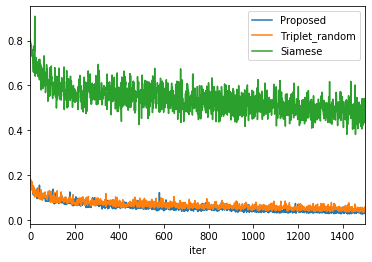

In [11]:
df_trn.plot(x='iter',y=['Proposed','Triplet_random','Siamese'])

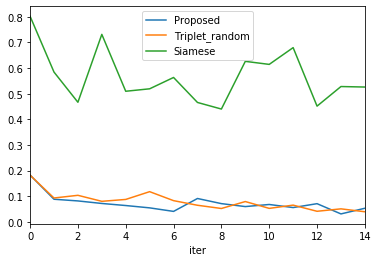

In [12]:
df_val.plot(x='iter',y=['Proposed','Triplet_random','Siamese'])

In [13]:
n_roll = 30
df_trn_ma = df_trn.rolling(n_roll).sum()
df_trn_ma['iter'] = np.arange(len(df_trn_ma))

In [14]:
df_trn_ma['norm_Proposed'] = df_trn_ma['Proposed'] / df_trn_ma['Proposed'][n_roll-1]
df_trn_ma['norm_Triplet_random'] = df_trn_ma['Triplet_random'] / df_trn_ma['Triplet_random'][n_roll-1]
df_trn_ma['norm_Siamese'] = df_trn_ma['Siamese'] / df_trn_ma['Siamese'][n_roll-1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


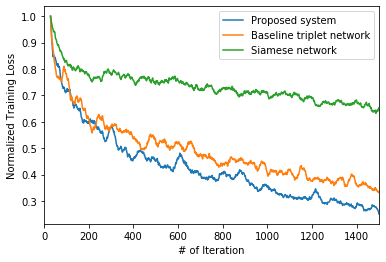

In [36]:
df_trn_ma.plot(x='iter',y=['norm_Proposed','norm_Triplet_random','norm_Siamese'],label=['Proposed system','Baseline triplet network','Siamese network'])
plt.ylabel('Normalized Training Loss')
plt.xlabel('# of Iteration')
plt.savefig('normalized_loss_curve_ma30_v2.eps', format='eps', dpi=1000)

In [16]:
nameset

['2019-07-23_08_35_27.740830',
 '2019-07-23_08_46_37.813892',
 '2019-07-23_08_56_02.660082']